In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
data = pd.read_json('profilic-pilot-interventions.json')
article = pd.read_json('Data.json')

In [3]:
data.head()

id  interventionSettings                                  user  \
0  32  CONVERSATIONAL_AGENT                    {'name': 'ilija2'}   
1  52       NO_INTERVENTION                      {'name': 'fail'}   
2  53   STATIC_INTERVENTION                 {'name': 'ipad test'}   
3  54  CONVERSATIONAL_AGENT                         {'name': '1'}   
4  73       NO_INTERVENTION  {'name': '60d83e179f08e41fff3cc8a4'}   

                                             article  validated userGuess  \
0  {'id': 1, 'title': 'LOCK MESS Sweden’s coronav...       True       LOW   
1  {'id': 16, 'title': 'Brussels bans toys: Party...      False      None   
2  {'id': 22, 'title': 'Oxford-AstraZeneca Covid-...      False      None   
3  {'id': 10, 'title': 'What are the pros and con...      False    MEDIUM   
4  {'id': 18, 'title': 'UK: lost, divided and alo...       True       LOW   

                                         explanation  
0                                    bla bla bla bla  
1                                               None  
2                                               None  
3                           because.................  
4  No images relating to the article or site maps...

In [4]:
validated_count = data['validated'].value_counts()
validated_count

True     63
False    18
Name: validated, dtype: int64

<AxesSubplot:xlabel='validated', ylabel='count'>

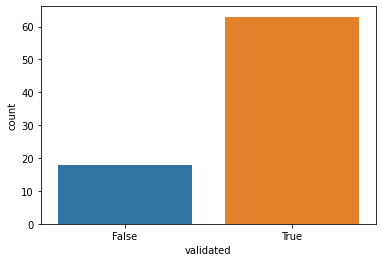

In [5]:
sns.countplot(x='validated', data=data)

In [6]:
validated = data[data['validated'] == True]
print(validated.count())
validated_with_answer = validated[validated['userGuess'].notnull()]
print(validated_with_answer.count())

id                      63
interventionSettings    63
user                    63
article                 63
validated               63
userGuess               61
explanation             61
dtype: int64
id                      61
interventionSettings    61
user                    61
article                 61
validated               61
userGuess               61
explanation             61
dtype: int64


In [7]:
def getArticleLabel(article_value):
    return article_value['quality']
validated_with_answer['trueLabel'] = validated_with_answer['article'].apply(getArticleLabel)

<ipython-input-7-7fe97c7c0143>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validated_with_answer['trueLabel'] = validated_with_answer['article'].apply(getArticleLabel)


In [8]:
validated_with_answer['positive'] =(validated_with_answer['userGuess'] == validated_with_answer['trueLabel'])


<ipython-input-8-40b63e6a40d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validated_with_answer['positive'] =(validated_with_answer['userGuess'] == validated_with_answer['trueLabel'])


In [9]:
validated_with_answer.head()

id  interventionSettings                                  user  \
0  32  CONVERSATIONAL_AGENT                    {'name': 'ilija2'}   
4  73       NO_INTERVENTION  {'name': '60d83e179f08e41fff3cc8a4'}   
5  74   STATIC_INTERVENTION  {'name': '60da0275e5adb32a16b4faf1'}   
6  75       NO_INTERVENTION  {'name': '5cde13c8f2c8e600159cb46e'}   
7  76       NO_INTERVENTION  {'name': '60da05ef643d00d0978fa473'}   

                                             article  validated userGuess  \
0  {'id': 1, 'title': 'LOCK MESS Sweden’s coronav...       True       LOW   
4  {'id': 18, 'title': 'UK: lost, divided and alo...       True       LOW   
5  {'id': 16, 'title': 'Brussels bans toys: Party...       True       LOW   
6  {'id': 25, 'title': 'Brexit: What you need to ...       True    MEDIUM   
7  {'id': 28, 'title': 'UK: Hate crime ‘at record...       True       LOW   

                                         explanation trueLabel  positive  
0                                    bla bla bla bla       LOW      True  
4  No images relating to the article or site maps...      HIGH     False  
5  Clear bias language from a single perspective....       LOW      True  
6  There was not-neutral language like "sadly" wh...      HIGH     False  
7  It's because it has a 1 sided view on Brexit, ...    MEDIUM     False

<AxesSubplot:xlabel='interventionSettings', ylabel='count'>

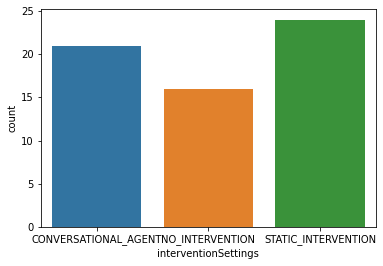

In [10]:
sns.countplot(x='interventionSettings', data=validated_with_answer)

In [11]:
no_intervention = validated_with_answer[validated_with_answer['interventionSettings']=='NO_INTERVENTION']
no_intervention = no_intervention.drop(['interventionSettings', 'validated'], axis=1)
print(no_intervention.count())
no_intervention.head()

id             16
user           16
article        16
userGuess      16
explanation    16
trueLabel      16
positive       16
dtype: int64


id                                  user  \
4   73  {'name': '60d83e179f08e41fff3cc8a4'}   
6   75  {'name': '5cde13c8f2c8e600159cb46e'}   
7   76  {'name': '60da05ef643d00d0978fa473'}   
8   77  {'name': '6010766724cb8f3a690a886d'}   
14  83  {'name': '60d41ff8cf1e1b520d8907bf'}   

                                              article userGuess  \
4   {'id': 18, 'title': 'UK: lost, divided and alo...       LOW   
6   {'id': 25, 'title': 'Brexit: What you need to ...    MEDIUM   
7   {'id': 28, 'title': 'UK: Hate crime ‘at record...       LOW   
8   {'id': 1, 'title': 'LOCK MESS Sweden’s coronav...      HIGH   
14  {'id': 4, 'title': 'Sputnik V launched to publ...    MEDIUM   

                                          explanation trueLabel  positive  
4   No images relating to the article or site maps...      HIGH     False  
6   There was not-neutral language like "sadly" wh...      HIGH     False  
7   It's because it has a 1 sided view on Brexit, ...    MEDIUM     False  
8                                    Very informative       LOW     False  
14  the article looks fine, it is written in intel...    MEDIUM      True

<AxesSubplot:xlabel='userGuess', ylabel='count'>

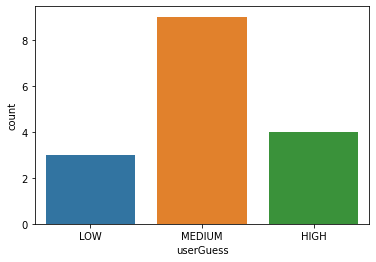

In [12]:
sns.countplot(x='userGuess', data=no_intervention)

<AxesSubplot:xlabel='trueLabel', ylabel='count'>

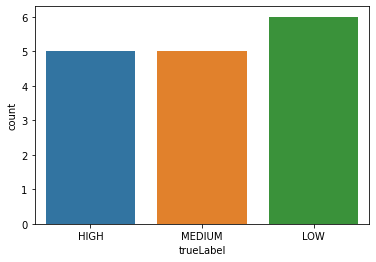

In [13]:
sns.countplot(x='trueLabel', data=no_intervention)

<AxesSubplot:xlabel='positive', ylabel='count'>

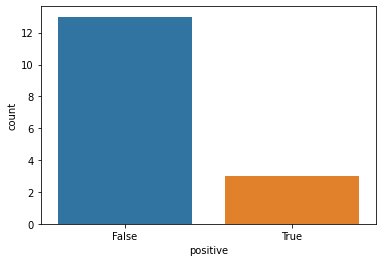

In [14]:
sns.countplot(x='positive', data=no_intervention)

In [15]:
static_intervention = validated_with_answer[validated_with_answer['interventionSettings']=='STATIC_INTERVENTION']
static_intervention = static_intervention.drop(['interventionSettings', 'validated'], axis=1)
print(static_intervention.count())
static_intervention.head()

id             24
user           24
article        24
userGuess      24
explanation    24
trueLabel      24
positive       24
dtype: int64


id                                  user  \
5   74  {'name': '60da0275e5adb32a16b4faf1'}   
13  82  {'name': '5fb83c4e8a2ddb53c66d0ed1'}   
15  84  {'name': '60da0f24ced86c334d0cd536'}   
16  85  {'name': '60cec1b28ba4d8c3a8a88fec'}   
17  86  {'name': '60da4929932e61d0f7a71a1e'}   

                                              article userGuess  \
5   {'id': 16, 'title': 'Brussels bans toys: Party...       LOW   
13  {'id': 11, 'title': 'JAB PASS Brits may have t...    MEDIUM   
15  {'id': 21, 'title': 'DOING IT FOR THE KIDS Oxf...       LOW   
16  {'id': 3, 'title': 'The Swedish experiment', '...    MEDIUM   
17  {'id': 9, 'title': 'Covid-19 vaccine: First pe...    MEDIUM   

                                          explanation trueLabel  positive  
5   Clear bias language from a single perspective....       LOW      True  
13  Style of the article is kinda weird, and I wou...       LOW     False  
15  As stated above, it is a tabloid newspaper. I ...       LOW      True  
16  I am not personally aware of this source and t...      HIGH     False  
17  The amount of information conveyed in the arti...    MEDIUM      True

<AxesSubplot:xlabel='userGuess', ylabel='count'>

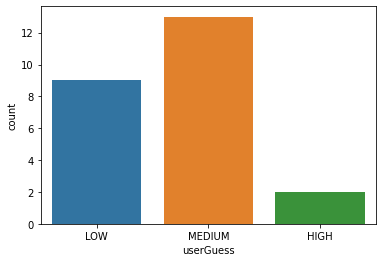

In [16]:
sns.countplot(x='userGuess', data=static_intervention)

<AxesSubplot:xlabel='trueLabel', ylabel='count'>

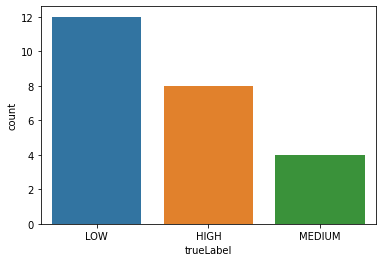

In [17]:
sns.countplot(x='trueLabel', data=static_intervention)

<AxesSubplot:xlabel='positive', ylabel='count'>

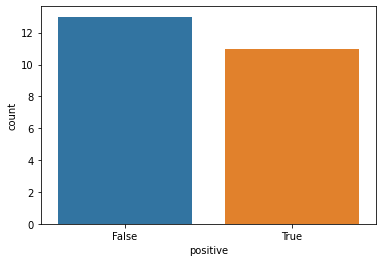

In [18]:
sns.countplot(x='positive', data=static_intervention)

In [19]:
conversational_agent = validated_with_answer[validated_with_answer['interventionSettings']=='CONVERSATIONAL_AGENT']
conversational_agent = conversational_agent.drop(['interventionSettings', 'validated'], axis=1)
print(conversational_agent.count())
conversational_agent.head()

id             21
user           21
article        21
userGuess      21
explanation    21
trueLabel      21
positive       21
dtype: int64


id                                  user  \
0    32                    {'name': 'ilija2'}   
10   79  {'name': '60d652226a3f34269da47acc'}   
11   80  {'name': '606b116c0312192853ccd01f'}   
24  118  {'name': '5ea94386ec2b53000a240fdb'}   
25  119  {'name': '5eafcba60746b6000822df5c'}   

                                              article userGuess  \
0   {'id': 1, 'title': 'LOCK MESS Sweden’s coronav...       LOW   
10  {'id': 20, 'title': 'How Brexit will 'change t...      HIGH   
11  {'id': 11, 'title': 'JAB PASS Brits may have t...      HIGH   
24  {'id': 19, 'title': 'Brexit hits German export...    MEDIUM   
25  {'id': 21, 'title': 'DOING IT FOR THE KIDS Oxf...    MEDIUM   

                                          explanation trueLabel  positive  
0                                     bla bla bla bla       LOW      True  
10                it was easy to read and interesting      HIGH      True  
11                     Gives different perspectives.        LOW     False  
24  I felt like there was not enough information, ...      HIGH     False  
25              More perspectives should be included.       LOW     False

<AxesSubplot:xlabel='userGuess', ylabel='count'>

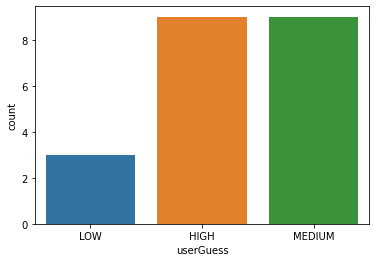

In [20]:
sns.countplot(x='userGuess', data=conversational_agent)

<AxesSubplot:xlabel='trueLabel', ylabel='count'>

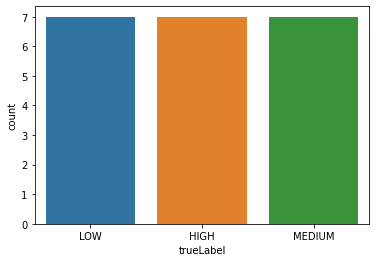

In [21]:
sns.countplot(x='trueLabel', data=conversational_agent)

<AxesSubplot:xlabel='positive', ylabel='count'>

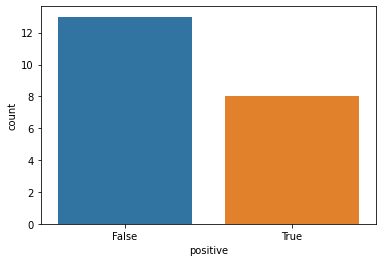

In [22]:
sns.countplot(x='positive', data=conversational_agent)

In [23]:
no_int_acc = no_intervention['positive'].sum()/no_intervention['positive'].count()
stat_int_acc = static_intervention['positive'].sum()/static_intervention['positive'].count()
con_agent_acc = conversational_agent['positive'].sum()/conversational_agent['positive'].count()
no_int_acc, stat_int_acc, con_agent_acc

(0.1875, 0.4583333333333333, 0.38095238095238093)

In [24]:
no_int_expl_mean = no_intervention['explanation'].apply(len).mean()
stat_int_expl_mean = static_intervention['explanation'].apply(len).mean()
con_agent_expl_mean = conversational_agent['explanation'].apply(len).mean()
no_int_expl_mean, stat_int_expl_mean, con_agent_expl_mean

(112.6875, 148.875, 89.85714285714286)